# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Loading Dataset**

In [2]:
df = pd.read_csv("consumer_classification_dataset.csv")

# **Data Preprocessing**

In [3]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Label encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Device_Used'] = le.fit_transform(df['Device_Used'])

# Split features and label
X = df.drop('Churn', axis=1)
y = df['Churn']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-3-54dd304ac7f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-54dd304ac7f6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# **Model Training**

In [4]:
# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# **Model Prediction**

In [5]:
# ---------- Model 1: KNN ----------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# ---------- Model 2: Decision Tree ----------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# ---------- Model 3: Naive Bayes ----------
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# ---------- Model 4: Neural Network ----------
nn = Sequential()
nn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
nn_pred = (nn.predict(X_test) > 0.5).astype("int32").flatten()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


# **Exploratory Data Analysis (EDA)**

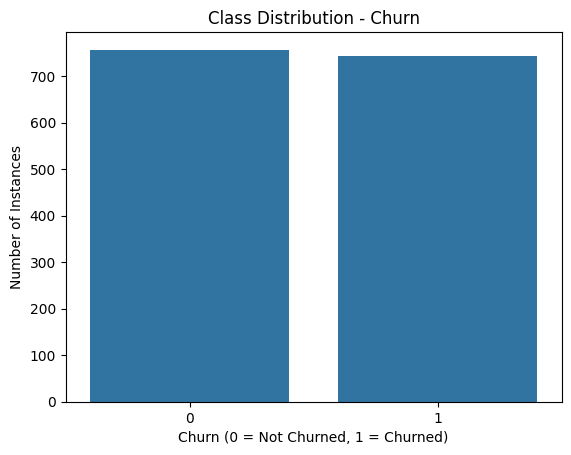

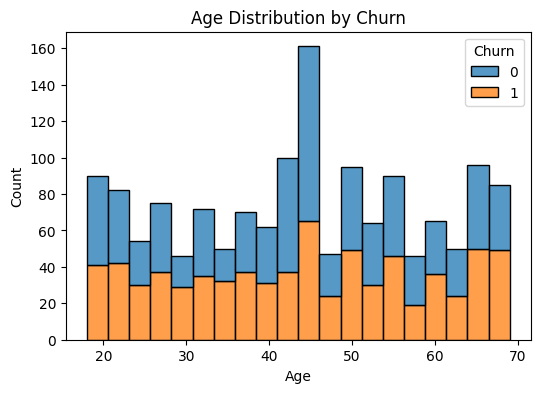

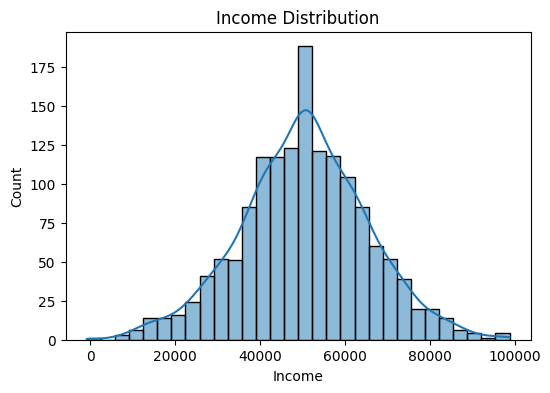

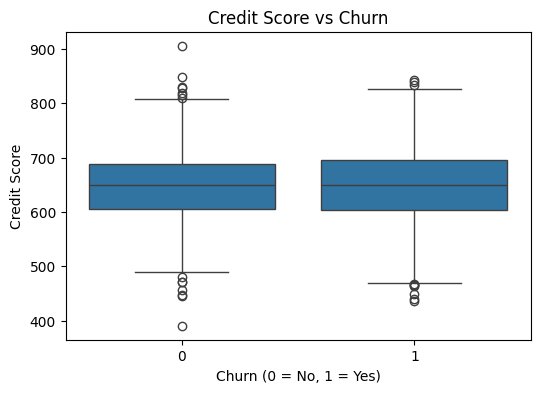

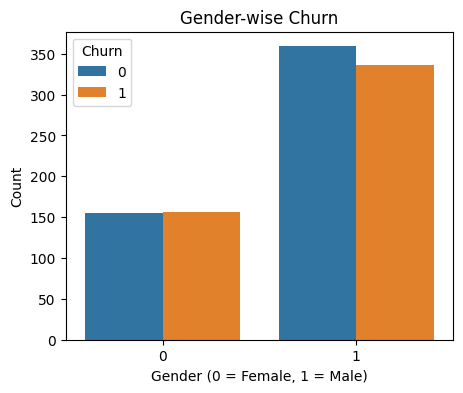

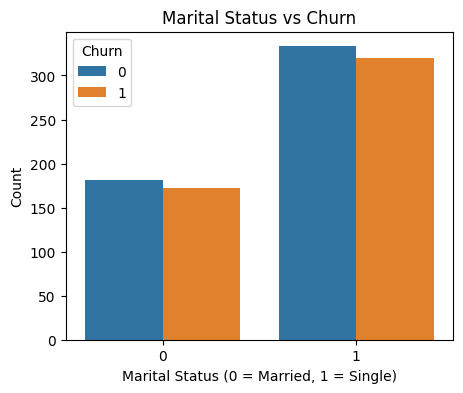

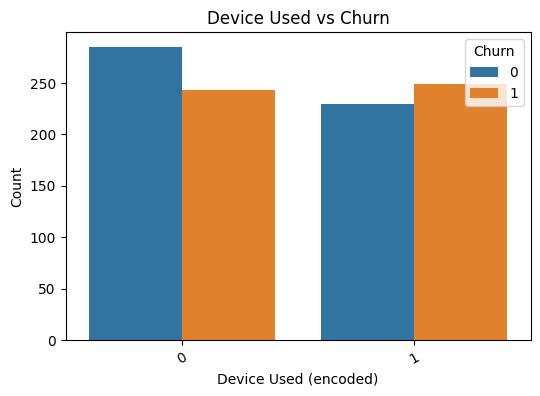

In [8]:
#Class Distribution
sns.countplot(x='Churn', data=df)
plt.title("Class Distribution - Churn")
plt.xlabel("Churn (0 = Not Churned, 1 = Churned)")
plt.ylabel("Number of Instances")
plt.show()

# Age distribution by Churn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack", bins=20)
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Income distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Income", bins=30, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Credit Score by Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Churn", y="Credit_Score")
plt.title("Credit Score vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Credit Score")
plt.show()

df = df[df['Gender'] != 2]
df = df[df['Device_Used'] != 2]
df = df[df['Marital_Status'] != 2]
# Gender-wise churn
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Gender", hue="Churn")
plt.title("Gender-wise Churn")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


# Marital status vs churn
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Marital_Status", hue="Churn")
plt.title("Marital Status vs Churn")
plt.xlabel("Marital Status (0 = Married, 1 = Single)")
plt.ylabel("Count")
plt.show()


# Device Used vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Device_Used", hue="Churn")
plt.title("Device Used vs Churn")
plt.xlabel("Device Used (encoded)")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()



# **Model Evaluation**

Accuracy Comparison: {'KNN': 0.49333333333333335, 'Decision Tree': 0.5, 'Naive Bayes': 0.5244444444444445, 'Neural Network': 0.5288888888888889}


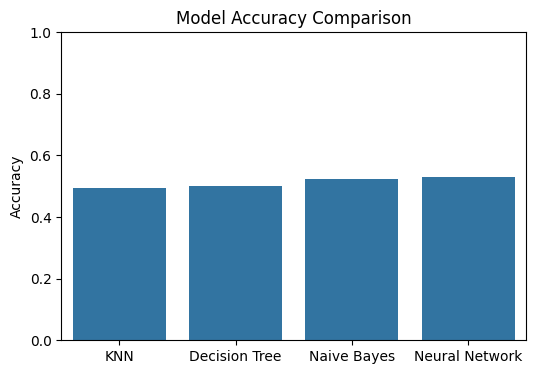


KNN Evaluation:


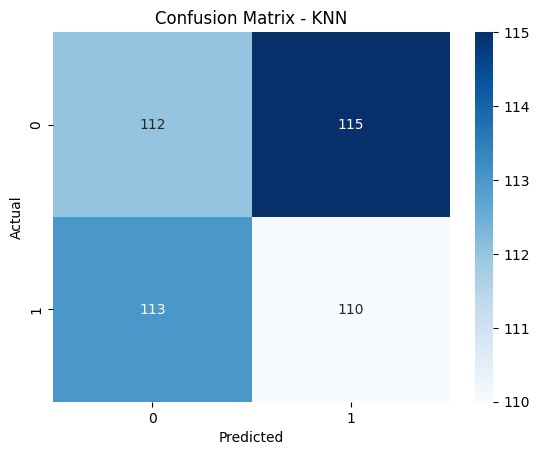

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       227
           1       0.49      0.49      0.49       223

    accuracy                           0.49       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.49      0.49      0.49       450

Accuracy Score: 0.4933

Decision Tree Evaluation:


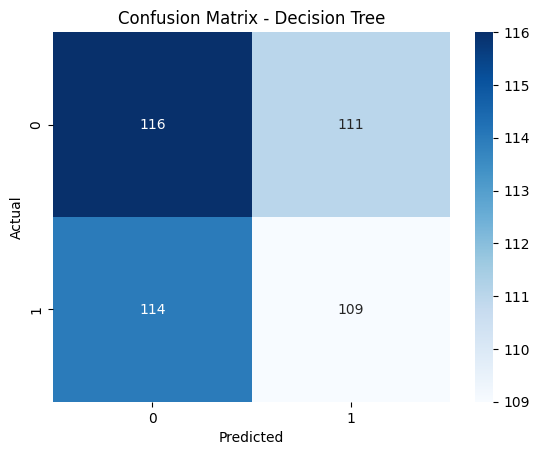

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       227
           1       0.50      0.49      0.49       223

    accuracy                           0.50       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.50      0.50      0.50       450

Accuracy Score: 0.5000

Naive Bayes Evaluation:


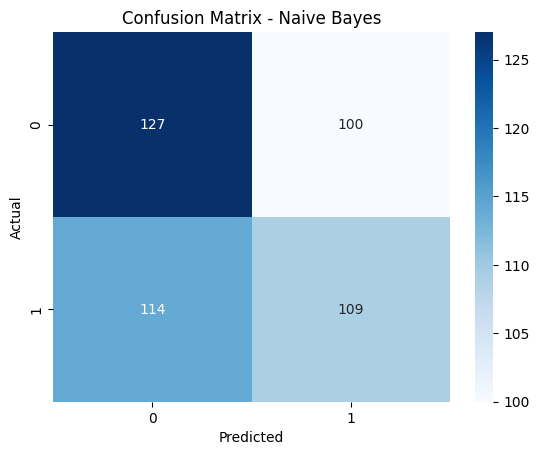

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       227
           1       0.52      0.49      0.50       223

    accuracy                           0.52       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.52      0.52      0.52       450

Accuracy Score: 0.5244

Neural Network Evaluation:


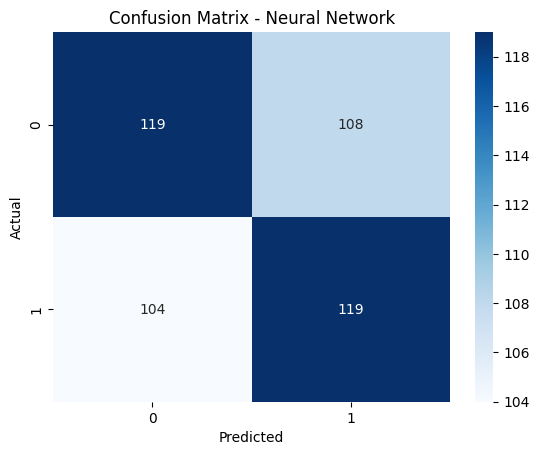

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       227
           1       0.52      0.53      0.53       223

    accuracy                           0.53       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.53      0.53      0.53       450

Accuracy Score: 0.5289
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


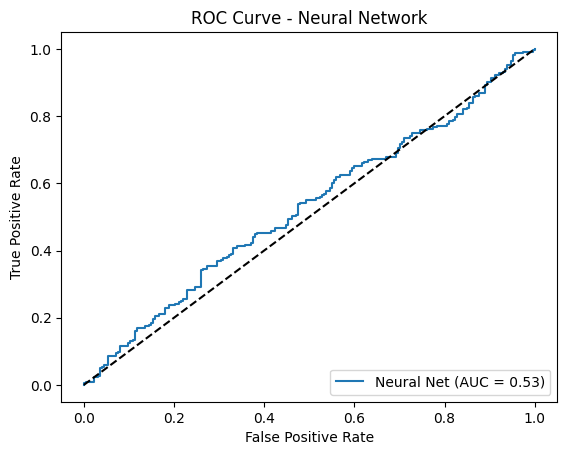

Neural Network AUC Score: 0.5259


In [7]:
# Accuracy Comparison
models = {
    'KNN': knn_pred,
    'Decision Tree': dt_pred,
    'Naive Bayes': nb_pred,
    'Neural Network': nn_pred
}

accuracies = {name: accuracy_score(y_test, pred) for name, pred in models.items()}
print("Accuracy Comparison:", accuracies)

# Accuracy Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Detailed Evaluation for each model
for name, pred in models.items():
    print(f"\n{name} Evaluation:")

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, pred))

    # Accuracy Score
    acc = accuracy_score(y_test, pred)
    print(f"Accuracy Score: {acc:.4f}")

# ROC & AUC specifically for Neural Network
nn_probs = nn.predict(X_test).flatten()
fpr, tpr, _ = roc_curve(y_test, nn_probs)
roc_auc = roc_auc_score(y_test, nn_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'Neural Net (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

print(f"Neural Network AUC Score: {roc_auc:.4f}")